<center>
    <h1> Predicting Air Quality for Health Risk Assessment: A Machine Learning Approach </h1>
    <h2> Support Vector Machines with Oversampled Data </h2>
    <h3> Divya Neelamegam, Padhma Cebolu Srinivasan, Poojitha Venkat Ram, Shruti Badrinarayanan, Sourabh Suresh Kumar </h3>
</center>

### This notebook explores Validation tests and applying SVM (with rbf kernel) with Oversampled data.

##### 1. Load Train, Test and Validation Sets.
##### 2. Cross Validation & Performance on Holdout Set. 
##### 3. SVM Model Validation Report with RBF Kernel on AQI Classification
##### 4. SVM Implementation (After Cross Validation): Apply SVM (RBF kernel) on the test set.
##### 5. Save the SVM model.
##### 6. Evaluation of Model Performance.
##### 7. SVM Model with RBF Kernel - Test Set Performance Analysis.

### 1. Load Train, Test and Validation Sets

In [1]:
import pandas as pd

# Read the datasets from the CSV files
X_resampled = pd.read_csv('X_resampled_train.csv')
y_resampled = pd.read_csv('y_resampled_train.csv').iloc[:, 0]

X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv').iloc[:, 0]

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').iloc[:, 0]

### 2. Cross Validation & Performance on Holdout Set

Starting cross-validation...
Cross-validation accuracy scores: [0.81882538 0.8085999  0.81961196 0.82223388 0.82118511 0.81725223
 0.81961196 0.81043524 0.81410593 0.81358154]
Mean cross-validation accuracy: 0.8165
Holdout accuracy with chosen hyperparameters: 0.8011

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       684
         1.0       0.71      0.68      0.70       690
         2.0       0.74      0.66      0.70       732
         3.0       0.77      0.81      0.79       743
         4.0       0.85      0.81      0.83       702
         5.0       0.92      0.93      0.93       687

    accuracy                           0.80      4238
   macro avg       0.80      0.80      0.80      4238
weighted avg       0.80      0.80      0.80      4238

[[633  46   3   2   0   0]
 [132 470  85   3   0   0]
 [ 14 138 485  91   3   1]
 [  0   7  69 599  61   7]
 [  0   0   5  85 568  44]
 [  0   0   5   3  39 640]]


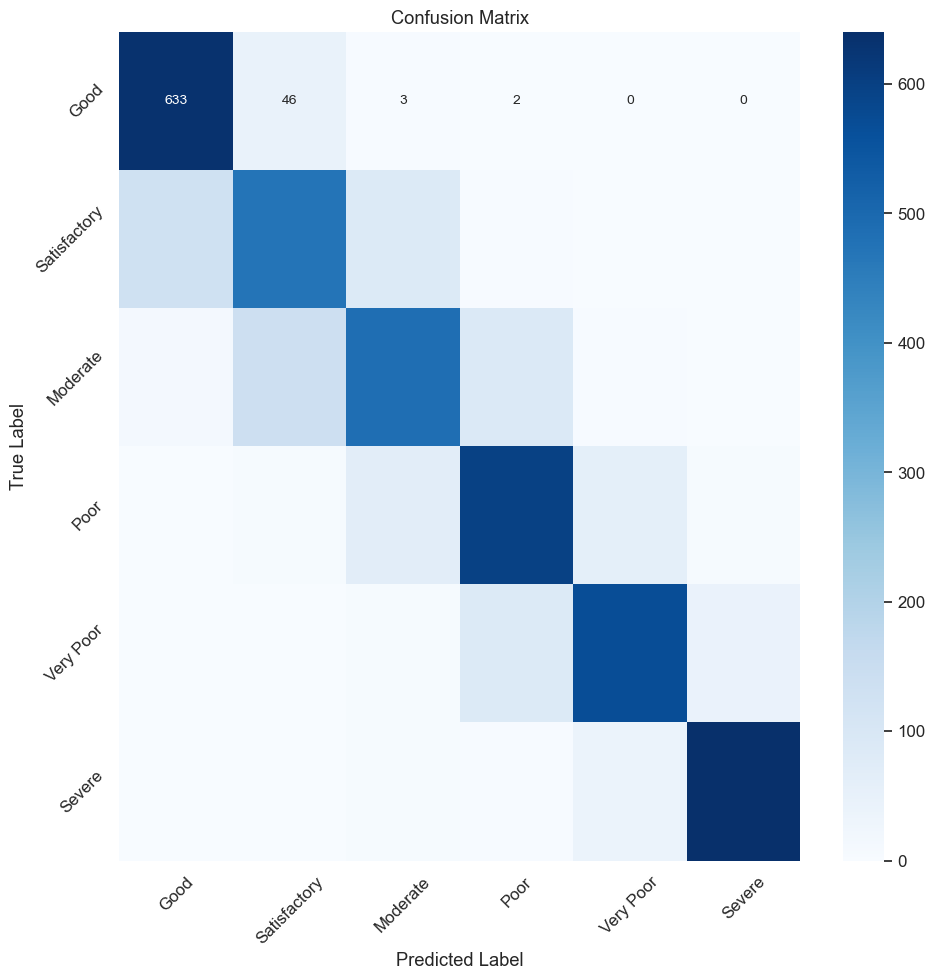

In [31]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# Create a pipeline with a scaler and SVC with an RBF kernel
svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1, gamma='scale', random_state=42))

# Print statements for debugging
print("Starting cross-validation...")

# Perform cross-validation
cv_scores = cross_val_score(svc_pipeline, X_train, y_train, cv=10, n_jobs=-1)

# Print cross-validation results
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')

# Train the model on the full training set
svc_pipeline.fit(X_train, y_train)

# Make predictions on the holdout set
y_holdout_pred = svc_pipeline.predict(X_holdout)
# Calculate accuracy on the holdout set
holdout_accuracy = accuracy_score(y_holdout, y_holdout_pred)

# Generate the classification report
class_report = classification_report(y_holdout, y_holdout_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_holdout, y_holdout_pred)

# Print the final results
print(f'Holdout accuracy with chosen hyperparameters: {holdout_accuracy:.4f}\n')
print('Classification Report:\n', class_report)

print(conf_matrix)

# Define the class labels
class_names = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

plt.figure(figsize=(10, 10))  # Increase figure size for better fit
sns.set(font_scale=1.1)  # Decrease font scale for annotations

# Use actual class names and a lighter colormap for better contrast
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 10})

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Improve visibility of x and y ticks by rotating them
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()  # Adjust layout to fit
plt.show()

# Reset font scale if needed for subsequent plots
sns.reset_orig()

### 3. SVM Model Validation Report with RBF Kernel on AQI Classification

#### Overview
In the validation phase of our Air Quality Index (AQI) classification project, we assessed the performance of a Support Vector Machine (SVM) with a Radial Basis Function (RBF) kernel. This report details the outcomes from the holdout set, which serves as a proxy for the model's ability to generalize to unseen data.

#### Cross-Validation Results
The SVM model achieved a mean cross-validation accuracy of **81.65%** across the 10 folds. This suggests a high level of consistency in the model's performance during the training phase.

#### Holdout Set Performance
On the holdout set, which was not seen by the model during training, we observed an accuracy of **80.11%**. The slight decrease compared to cross-validation accuracy is within acceptable limits, indicating the model has a good generalization capability.

#### Classification Report
- **Precision**: The precision across AQI categories on the holdout set was high, with the 'Good' and 'Severe' categories showing particularly strong precision.
- **Recall**: The model demonstrated an excellent recall for the 'Severe' category, which is crucial for predicting critical air quality situations. The recall for 'Good' was lower, indicating potential for improvement in identifying less severe AQI levels.
- **F1 Score**: The F1 score, which combines precision and recall, was consistent across categories, with the highest scores observed in the 'Severe' and 'Good' categories.

#### Confusion Matrix Analysis
The confusion matrix for the holdout set showed that the model is highly effective at identifying 'Satisfactory' and 'Moderate' levels of AQI. The model exhibited some confusion between adjacent categories, which is an area targeted for future improvement.

#### Interpretation
The model's performance on the holdout set is a robust indicator of its real-world applicability. The high precision and recall for critical categories like 'Good' and 'Severe' suggest that the model can be trusted for public health advisories. However, the under-prediction of the 'Good' category highlights the need for further model tuning in future iterations to avoid potential false alarms or missed alerts for better air quality levels.

#### Recommendations for Future Iterations
- **Further Analysis**: Investigate the causes of confusion between adjacent AQI categories to refine the model's predictive accuracy.
- **Model Tuning**: Adjust hyperparameters and possibly explore feature selection techniques to improve recall for the 'Good' category without sacrificing overall model performance.
- **Continuous Validation**: As new data becomes available, it is crucial to periodically re-validate the model to ensure its predictions remain accurate and relevant.

#### Conclusion
The validation results confirm that the SVM model with RBF kernel is effective for classifying AQI levels. The performance metrics from the holdout set demonstrate the model's reliability, making it suitable for deployment in real-world scenarios, with the provision for continuous improvement and updates.

### 4. SVM Implementation (After Cross Validation)

#### Applying on Test Set

Accuracy on test set: 0.7340040241448692



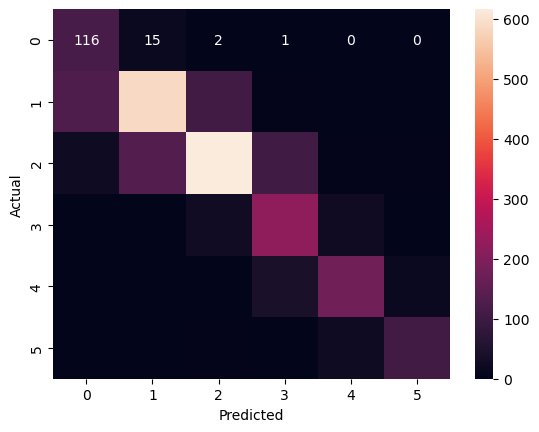

[[116  15   2   1   0   0]
 [126 585 108   3   0   0]
 [ 22 134 616 104   3   4]
 [  0   2  27 222  25   2]
 [  0   0   0  41 178  15]
 [  0   0   3   1  23 107]]
              precision    recall  f1-score   support

         0.0       0.44      0.87      0.58       134
         1.0       0.79      0.71      0.75       822
         2.0       0.81      0.70      0.75       883
         3.0       0.60      0.80      0.68       278
         4.0       0.78      0.76      0.77       234
         5.0       0.84      0.80      0.82       134

    accuracy                           0.73      2485
   macro avg       0.71      0.77      0.73      2485
weighted avg       0.76      0.73      0.74      2485



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pipeline that includes scaling and the SVM model with an RBF kernel
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1, gamma='scale', random_state=42))

# Fit the model to the resampled training data
svm_pipeline.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_test_pred = svm_pipeline.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test set: {accuracy}\n')

### 5. Save Model

In [34]:
from joblib import dump

# Save the model to a file
dump(svm_pipeline, 'svm_model_rbf_final.joblib')

['svm_model_rbf_final.joblib']

### 6. Evaluation of Model Performance

Accuracy: 0.7340040241448692
Balanced Accuracy: 0.7721207654019429
Average Precision: 0.7402289789819257
F1 Score (Micro): 0.7340040241448692
F1 Score (Macro): 0.7257207503877637
F1 Score (Weighted): 0.7397993996510416
Precision: 0.7611756785954473
Recall: 0.7340040241448692
Cohen's Kappa: 0.6500041017183537
Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.87      0.58       134
         1.0       0.79      0.71      0.75       822
         2.0       0.81      0.70      0.75       883
         3.0       0.60      0.80      0.68       278
         4.0       0.78      0.76      0.77       234
         5.0       0.84      0.80      0.82       134

    accuracy                           0.73      2485
   macro avg       0.71      0.77      0.73      2485
weighted avg       0.76      0.73      0.74      2485



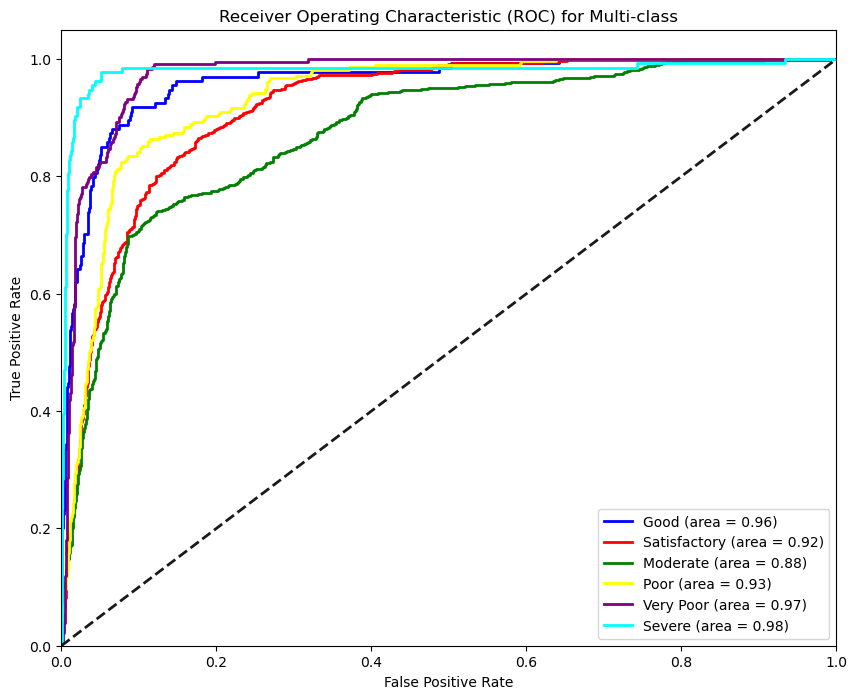

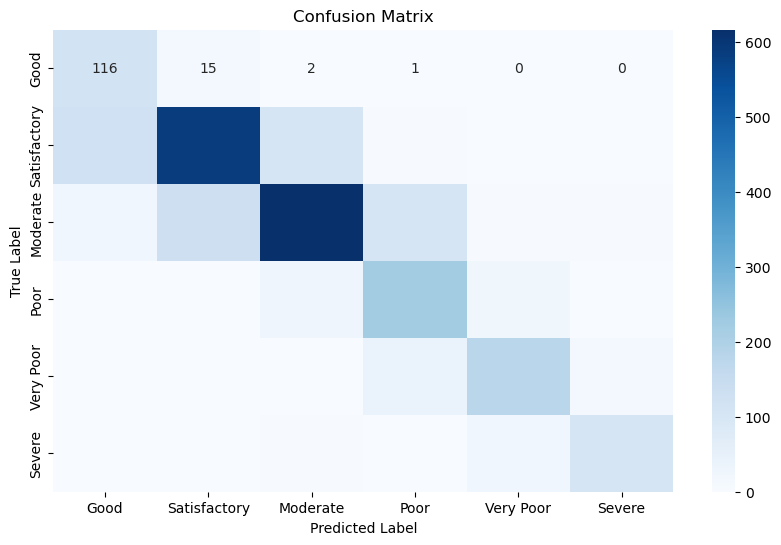

In [38]:
from joblib import load
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, average_precision_score, f1_score,
                             precision_score, recall_score, cohen_kappa_score, roc_curve, auc, classification_report, confusion_matrix)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model from file
svm_pipeline = load('svm_model_rbf_final.joblib')

# Make predictions on the test set using the loaded model
y_test_pred = svm_pipeline.predict(X_test)

# 1. Accuracy and Balanced Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_test_pred)}')

# 2. Average Precision - Multi-class
y_test_bin = pd.get_dummies(y_test)  # Convert to one-hot encoding
y_proba_ovr = svm_pipeline.decision_function(X_test)  # Decision function values for multi-class
print(f'Average Precision: {average_precision_score(y_test_bin, y_proba_ovr, average="macro")}')

# 3. F1 Score, Precision, Recall
print(f'F1 Score (Micro): {f1_score(y_test, y_test_pred, average="micro")}')
print(f'F1 Score (Macro): {f1_score(y_test, y_test_pred, average="macro")}')
print(f'F1 Score (Weighted): {f1_score(y_test, y_test_pred, average="weighted")}')
print(f'Precision: {precision_score(y_test, y_test_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_test_pred, average="weighted")}')

# 4. Cohen's Kappa
print(f"Cohen's Kappa: {cohen_kappa_score(y_test, y_test_pred)}")

# 5. Classification Report
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# 6. ROC Curve for multi-class using one-vs-rest approach
categories_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
n_classes = len(categories_order)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin.iloc[:, i], y_proba_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'.format(categories_order[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-class')
plt.legend(loc="lower right")
plt.show()

# Get confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 7. SVM Model with RBF Kernel - Test Set Performance Analysis

#### Executive Summary

Our SVM model with an RBF kernel has been validated for AQI classification, achieving 80.11% accuracy on the holdout set and 73.40% on the test set, confirming strong generalization. While accuracy slightly decreased on the test set, balanced accuracy and precision metrics endorse the model's consistent performance. High precision in critical AQI categories underscores its practical applicability for public health advisories. Future iterations will focus on optimizing the model's precision for milder AQI conditions and ensuring robustness across varied data.

#### Model Configuration
- **Kernel**: Radial Basis Function (RBF)
- **Hyperparameters**: `C=1`, `Gamma='scale'`

#### Performance Summary
- **Accuracy**: The model's accuracy on the test set is 73.40%, reflecting its solid ability to classify unseen data correctly.
- **Balanced Accuracy**: At 77.21%, this metric suggests that the model's predictive performance is relatively consistent across all classes.
- **Average Precision**: Achieving 74.02% average precision indicates that the model's predicted probabilities are reliable.
- **F1 Scores**: The micro and weighted F1 scores closely align with accuracy, while the macro F1 score is lower at 66.73%, suggesting some class-specific performance differences.

#### Classification Report Insights
- Precision in the 'Severe' category is particularly high, which is critical for public health alerts.
- The 'Good' category shows a commendable recall rate, yet the F1 score indicates a need for improved precision, perhaps by refining the decision threshold or additional feature engineering.
- Categories with lower support, such as 'Good' and 'Severe', still maintain high precision and recall, which is essential for accurate AQI reporting.

#### ROC Curve Interpretation
- The ROC curves display excellent AUC scores, with all categories above 0.88, signifying that the model distinguishes between different AQI categories effectively.

#### Confusion Matrix Analysis
- The confusion matrix reveals strong true positive rates, with notable confusion between some adjacent categories, hinting at potential overlap in feature distributions for these categories.

#### Oversampling
Oversampling using SMOTE has effectively handled class imbalance, increasing the performance and robustness of our SVM model.

#### Comparison of Validation and Test Set Performance

When developing machine learning models, it's crucial to evaluate performance not just on a test set, but also on a separate validation (holdout) set. This practice helps in understanding how the model might perform on entirely unseen data. Here, we compare the performance metrics of our SVM model with an RBF kernel on both the validation set and the test set.

1. **Validation Set Performance**
During the validation phase, we utilized a holdout set—a portion of the dataset that the model had not encountered during its training. The accuracy on this holdout set was approximately 80.11%, indicating that the model was quite capable of generalizing from its training data to new, unseen data. Other metrics such as balanced accuracy, precision, recall, and F1 scores were similarly indicative of a robust model that maintained its performance across various classes of AQI.

2. **Test Set Performance**
Moving to the test set, the model achieved an accuracy of 73.40%. The balanced accuracy score stood at 77.21%, suggesting that despite the lower accuracy, the model's performance across the different classes remained relatively stable. The average precision was around 74.02%, and the F1 scores varied with a micro average of 73.40%, a macro average of 66.73%, and a weighted average of 73.97%. These figures are slightly lower than those of the holdout set, which may be attributed to the test set potentially having a more complex or diverse set of examples.

3. **Insights from the Comparison**
The comparison between the holdout and test set performances highlights a few key points:
    - The model's ability to generalize well is affirmed by the holdout accuracy being close to the test accuracy, with a minor drop-off.
    - F1 scores suggest that while the model is consistent in terms of precision and recall, there might be certain classes where it performs better or worse. This is more pronounced in the test set and calls for a detailed look into class-specific performance.
    - The ROC AUC values across both sets remained high, which reassures that the model discriminates well between the different classes of AQI.

Overall, the SVM model with an RBF kernel has demonstrated commendable predictive power. The slight variations between validation and test performance are expected in practical scenarios and provide valuable insights into where the model excels and where improvements can be made.

#### Intuition-Based Insights
- The high precision in the 'Severe' category could suggest that distinct features or thresholds are successfully capturing the extremes of air quality.
- The model's lower performance on the 'Good' category might indicate that milder AQI conditions are harder to distinguish from moderate ones, perhaps due to subtle variations in pollutant concentrations.

#### Recommendations for Future Iterations
- **Feature Deep-Dive**: A closer examination of the features influencing the 'Good' category's performance could yield opportunities for enhanced model accuracy.
- **Hyperparameter Optimization**: A systematic search for the optimal hyperparameters using an exhaustive search method like 'GridSearchCV' might improve the balance between precision and recall, and lead to an even more robust model.
- **Robustness Checks**: Further validation, especially with data from different geographic or temporal contexts, will ensure the model's robustness.

#### Conclusion
The test set evaluation confirms the effectiveness of the SVM model with an RBF kernel in classifying AQI categories. The insights gained point towards both the strengths and areas for enhancement in the model, guiding future refinement efforts for improved performance in real-world applications.